In [1]:
# 🔁 Alternativa API:er du kan testa (ofta gratis i begränsat omfång):
# 1. Alpha Vantage
# Gratis API-nyckel
#
# Realtidsdata, PE-tal, EPS, utdelningar m.m.
#
# Begränsning: 5 anrop per minut (gratisversion)
#

import requests

api_key = 'DIN_API_NYCKEL'
symbol = 'AAPL'
url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()
print("P/E:", data.get("PERatio"))
print("EPS:", data.get("EPS"))
print("Dividend yield:", data.get("DividendYield"))


P/E: 30.93
EPS: 6.43
Dividend yield: 0.0051


In [7]:
data

{'Symbol': 'AAPL',
 'AssetType': 'Common Stock',
 'Name': 'Apple Inc',
 'Description': "Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue (totalling $274.5 billion in 2020) and, since January 2021, the world's most valuable company. As of 2021, Apple is the world's fourth-largest PC vendor by unit sales, and fourth-largest smartphone manufacturer. It is one of the Big Five American information technology companies, along with Amazon, Google, Microsoft, and Facebook.",
 'CIK': '320193',
 'Exchange': 'NASDAQ',
 'Currency': 'USD',
 'Country': 'USA',
 'Sector': 'TECHNOLOGY',
 'Industry': 'ELECTRONIC COMPUTERS',
 'Address': 'ONE INFINITE LOOP, CUPERTINO, CA, US',
 'OfficialSite': 'https://www.apple.com',
 'FiscalYearEnd': 'September',
 'LatestQuarter': '2025-03-31',
 'MarketCapitalization': '2970581205000',
 'EBITDA': '138866000000',
 'PERatio

In [9]:
# 1. Intraday Data (Minutdata)
# För att hämta aktiekurser varje minut för t.ex. Apple (symbol: AAPL) under ett intervall om 1 minut:
#
import requests
import pandas as pd

api_key = 'DIN_API_NYCKEL'
symbol = 'AAPL'
interval = '15min'  # Alternativ: 5min, 15min, 30min, 60min
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Om du vill konvertera JSON till en pandas DataFrame för enklare hantering
df = pd.DataFrame(data['Time Series (1min)']).T
df.index = pd.to_datetime(df.index)
print(df.head())



print("\n", f"{len(df)  =  }")

                      1. open   2. high    3. low  4. close 5. volume
2025-05-06 19:59:00  201.1016  201.1900  201.1000  201.1500      1659
2025-05-06 19:58:00  201.1505  201.1900  201.1000  201.1000      2090
2025-05-06 19:57:00  201.2000  201.2200  201.0000  201.1513      2706
2025-05-06 19:56:00  201.2500  201.2500  201.1455  201.2100      1207
2025-05-06 19:55:00  201.1800  201.2900  201.1500  201.2100      3337


In [25]:
#
#for row in df['4. close']:
#    print(row)
#
# len(df)

In [27]:
# 2. Daglig Data
# För att hämta dagliga aktiekurser för Apple:
#

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Konvertera till DataFrame för att visualisera eller bearbeta
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
print(df.head())

print("\n", f"{len(df)  =  }")

             1. open   2. high    3. low  4. close  5. volume
2025-05-06  198.2100  200.6500  197.0200  198.5100   51216482
2025-05-05  203.1000  204.1000  198.2100  198.8900   69018452
2025-05-02  206.0900  206.9900  202.1600  205.3500  101010621
2025-05-01  209.0800  214.5600  208.9000  213.3200   57365675
2025-04-30  209.3000  213.5800  206.6705  212.5000   52286454


In [29]:
len(df)

100

In [33]:
# 3. Veckovis Data
# För att hämta veckodata:
#

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Konvertera till DataFrame
df = pd.DataFrame(data['Weekly Time Series']).T
df.index = pd.to_datetime(df.index)
print(df.head())

print("\n", f"{len(df)  =  }")

             1. open   2. high    3. low  4. close  5. volume
2025-05-06  203.1000  204.1000  197.0200  198.5100  120234934
2025-05-02  210.0000  214.5600  202.1600  205.3500  286233457
2025-04-25  193.2650  209.7500  189.8112  209.2800  238181320
2025-04-17  211.4400  212.9400  192.3700  196.9800  264593881
2025-04-11  177.2000  200.6100  169.2101  198.1500  675037558


In [35]:
len(df)

1331

In [41]:
# 4. Månadsvis Data
# För att hämta månadsdata:
#

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Konvertera till DataFrame
df = pd.DataFrame(data['Monthly Time Series']).T
df.index = pd.to_datetime(df.index)
print(df.head())

print("\n", f"{len(df)  =  }")

             1. open   2. high    3. low  4. close   5. volume
2025-05-06  209.0800  214.5600  197.0200  198.5100   278611230
2025-04-30  219.8050  225.1900  169.2101  212.5000  1607318483
2025-03-31  241.7900  244.0272  208.4200  222.1300  1114686136
2025-02-28  229.9900  250.0000  225.7000  241.8400   862317019
2025-01-31  248.9300  249.1000  219.3800  236.0000  1200291603

 len(df)  =  306


In [47]:

for index, row in df.iterrows():
    print(f"Datum: {index}, Öppning: {row['1. open']}, Stängning: {row['4. close']}")

Datum: 2025-05-06 00:00:00, Öppning: 209.0800, Stängning: 198.5100
Datum: 2025-04-30 00:00:00, Öppning: 219.8050, Stängning: 212.5000
Datum: 2025-03-31 00:00:00, Öppning: 241.7900, Stängning: 222.1300
Datum: 2025-02-28 00:00:00, Öppning: 229.9900, Stängning: 241.8400
Datum: 2025-01-31 00:00:00, Öppning: 248.9300, Stängning: 236.0000
Datum: 2024-12-31 00:00:00, Öppning: 237.2700, Stängning: 250.4200
Datum: 2024-11-29 00:00:00, Öppning: 220.9650, Stängning: 237.3300
Datum: 2024-10-31 00:00:00, Öppning: 229.5200, Stängning: 225.9100
Datum: 2024-09-30 00:00:00, Öppning: 228.5500, Stängning: 233.0000
Datum: 2024-08-30 00:00:00, Öppning: 224.3700, Stängning: 229.0000
Datum: 2024-07-31 00:00:00, Öppning: 212.0900, Stängning: 222.0800
Datum: 2024-06-28 00:00:00, Öppning: 192.9000, Stängning: 210.6200
Datum: 2024-05-31 00:00:00, Öppning: 169.5800, Stängning: 192.2500
Datum: 2024-04-30 00:00:00, Öppning: 171.1900, Stängning: 170.3300
Datum: 2024-03-28 00:00:00, Öppning: 179.5500, Stängning: 171.

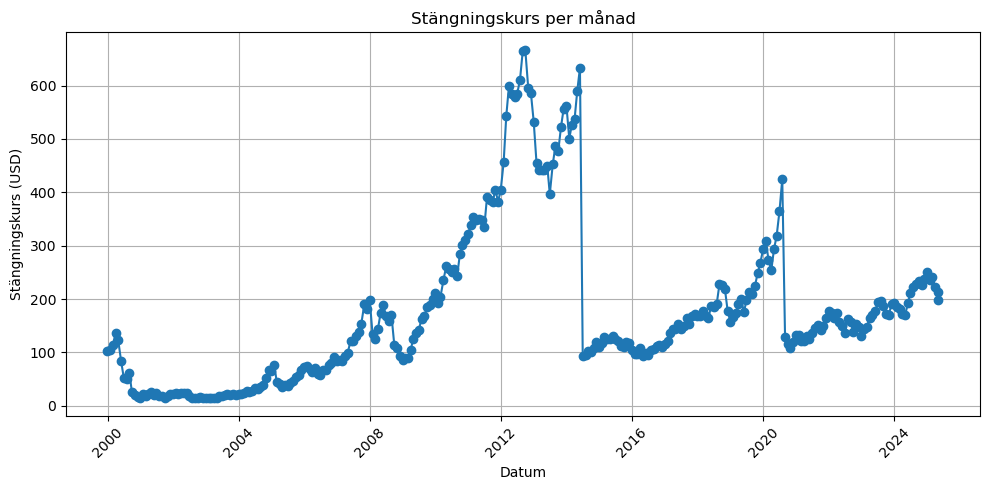

In [49]:
import matplotlib.pyplot as plt

# Se till att index är i stigande datumordning
df_sorted = df.sort_index()

# Konvertera stängningskurs till float om det inte redan är
df_sorted['4. close'] = df_sorted['4. close'].astype(float)

# Plotta
plt.figure(figsize=(10, 5))
plt.plot(df_sorted.index, df_sorted['4. close'], marker='o', linestyle='-')
plt.title('Stängningskurs per månad')
plt.xlabel('Datum')
plt.ylabel('Stängningskurs (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔍 Vad detta gör:
# Sorterar datumen i rätt ordning (äldre till nyare)
# Säkerställer att värdena är numeriska
# Plottar en linjegraf med punkter markerade
# Gör layouten snygg och läsbar med roterade datumetiketter

In [ ]:
# 2. Kombinera EPS och kursdata för P/E per datum:
# Exempel:
#


In [51]:
# Hämta månadsvis prisdata
url_price = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbol}&apikey={api_key}'
price_data = requests.get(url_price).json()
monthly_prices = price_data["Monthly Time Series"]

# Hämta kvartalsvisa EPS
url_eps = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}'
eps_data = requests.get(url_eps).json()
quarterly_earnings = eps_data["quarterlyEarnings"]


In [111]:
# Exempel: plocka ett par datapunkter
list_of_values = []
list_of_date = []
list_of_pe = []
for q in quarterly_earnings[:16]:  # senaste 4 kvartalen
    date = q["fiscalDateEnding"]  # tex '2023-12-31'
    eps = float(q["reportedEPS"])
    # Sök närmast datum i prisdata
    price = next((float(v["4. close"]) for k, v in monthly_prices.items() if k.startswith(date[:7])), None)
    if price:
        pe = round(price / eps, 2) if eps != 0 else None
        print(f"{date}: EPS={eps}, Price={price}, P/E={pe}")
        list_of_values.append([date, eps, price, pe])
        list_of_date.append(date)
        list_of_pe.append(pe)


2025-03-31: EPS=1.65, Price=222.13, P/E=134.62
2024-12-31: EPS=2.4, Price=250.42, P/E=104.34
2024-09-30: EPS=1.64, Price=233.0, P/E=142.07
2024-06-30: EPS=1.4, Price=210.62, P/E=150.44
2024-03-31: EPS=1.53, Price=171.48, P/E=112.08
2023-12-31: EPS=2.18, Price=192.53, P/E=88.32
2023-09-30: EPS=1.46, Price=171.21, P/E=117.27
2023-06-30: EPS=1.26, Price=193.97, P/E=153.94
2023-03-31: EPS=1.52, Price=164.9, P/E=108.49
2022-12-31: EPS=1.88, Price=129.93, P/E=69.11
2022-09-30: EPS=1.29, Price=138.2, P/E=107.13
2022-06-30: EPS=1.2, Price=136.72, P/E=113.93
2022-03-31: EPS=1.52, Price=174.61, P/E=114.88
2021-12-31: EPS=2.1, Price=177.57, P/E=84.56
2021-09-30: EPS=1.24, Price=141.5, P/E=114.11
2021-06-30: EPS=1.3, Price=136.96, P/E=105.35


In [107]:
print(f"{len(quarterly_earnings)  =  } \t\t {len(quarterly_earnings)/4  =  }")
quarterly_earnings[0]

len(quarterly_earnings)  =  117 		 len(quarterly_earnings)/4  =  29.25


{'fiscalDateEnding': '2025-03-31',
 'reportedDate': '2025-05-01',
 'reportedEPS': '1.65',
 'estimatedEPS': '1.6',
 'surprise': '0.05',
 'surprisePercentage': '3.125',
 'reportTime': 'post-market'}

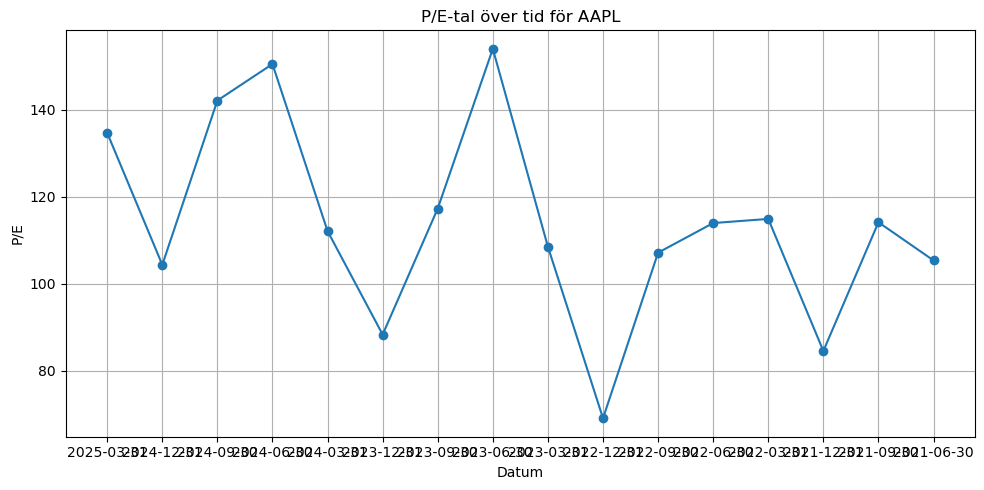

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(list_of_date, list_of_pe, marker='o', linestyle='-')
plt.title(f'P/E-tal över tid för {symbol}')
plt.xlabel('Datum')
plt.ylabel('P/E')
plt.grid(True)
plt.tight_layout()
plt.show()

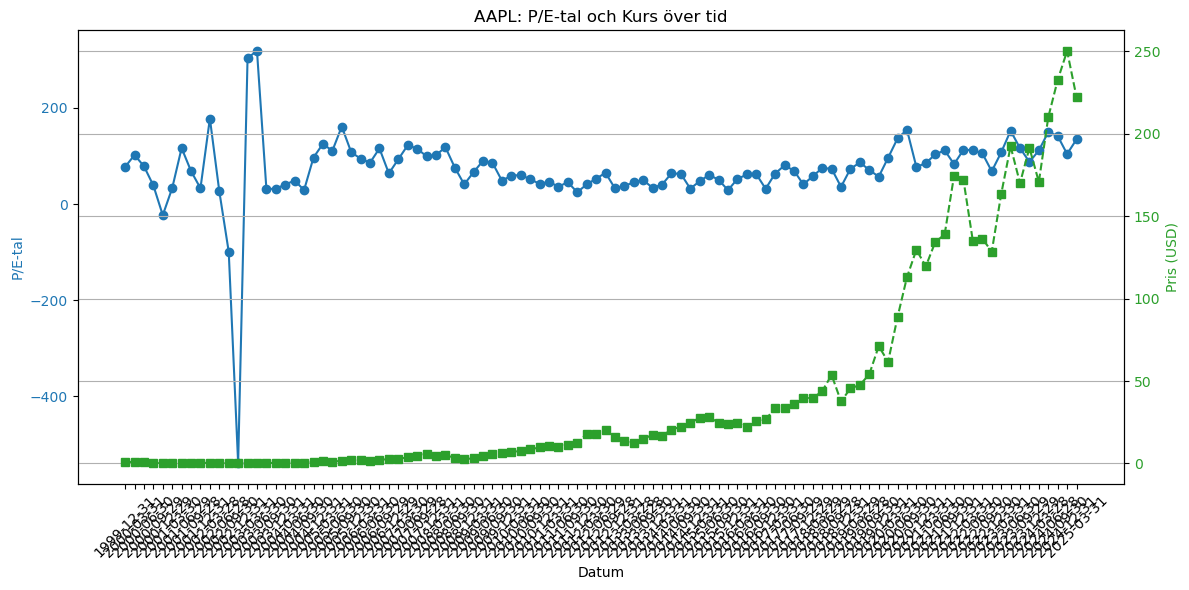

In [121]:
# 📊 Vad som är nytt:
# P/E-tal visas på vänster y-axel.
# Aktiekurs visas på höger y-axel.
# Båda kurvorna ritas mot tid på x-axeln.
#
# 🧠 Kodexempel:
#
import requests
import matplotlib.pyplot as plt
from datetime import datetime


# --- 1. Ange din API-nyckel och symbol ---
api_key = 'DIN_API_NYCKEL'  # <-- Ersätt med din riktiga API-nyckel
symbol = 'AAPL'

# --- 2. Hämta EPS-data (quarterly earnings) ---
eps_url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}'
eps_response = requests.get(eps_url)
eps_data = eps_response.json()
quarterly_earnings = eps_data.get("quarterlyEarnings", [])

# --- 3. Hämta månatlig prisdata (adjusted close) ---
price_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={symbol}&apikey={api_key}'
price_response = requests.get(price_url)
price_data = price_response.json()
monthly_prices_raw = price_data.get("Monthly Adjusted Time Series", {})

# Konvertera prisdata till {datum: kurs}
monthly_prices = {date: float(info["5. adjusted close"]) for date, info in monthly_prices_raw.items()}

# --- 4. Hjälpfunktion för att matcha datum ---
def find_nearest_price_date(target_date_str, available_dates):
    target_date = datetime.strptime(target_date_str, "%Y-%m-%d")
    past_dates = [datetime.strptime(d, "%Y-%m-%d") for d in available_dates if datetime.strptime(d, "%Y-%m-%d") <= target_date]
    if not past_dates:
        return None
    nearest_date = max(past_dates)
    return nearest_date.strftime("%Y-%m-%d")


# --- 5. Bygg listor för datum, P/E-tal och pris ---
dates, pes, prices = [], [], []

for q in quarterly_earnings:
    date = q.get("fiscalDateEnding")
    eps_str = q.get("reportedEPS")

    if eps_str not in (None, "0", "None"):
        try:
            eps = float(eps_str)
        except ValueError:
            continue

        matched_date = find_nearest_price_date(date, monthly_prices.keys())
        if matched_date:
            price = monthly_prices[matched_date]
            pe_ratio = price / eps
            dates.append(matched_date)
            pes.append(pe_ratio)
            prices.append(price)

# Kontroll om data saknas
if not dates:
    print("Inga matchande data hittades. Kontrollera symbol och API-nyckel.")
    exit()

# Sortera efter datum
sorted_data = sorted(zip(dates, pes, prices), key=lambda x: x[0])
dates, pes, prices = zip(*sorted_data)


# --- 6. Rita grafen med två y-axlar ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# P/E-tal på vänster y-axel
ax1.set_xlabel("Datum")
ax1.set_ylabel("P/E-tal", color="tab:blue")
ax1.plot(dates, pes, marker='o', color="tab:blue", label="P/E-tal")
ax1.tick_params(axis='y', labelcolor="tab:blue")
plt.xticks(rotation=45)

# Kurs på höger y-axel
ax2 = ax1.twinx()
ax2.set_ylabel("Pris (USD)", color="tab:green")
ax2.plot(dates, prices, marker='s', linestyle='--', color="tab:green", label="Pris")
ax2.tick_params(axis='y', labelcolor="tab:green")

# Titel och layout
plt.title(f"{symbol}: P/E-tal och Kurs över tid")
plt.tight_layout()
plt.grid(True)
plt.show()